# Evaluate power of sentiment to predict S&Pprice movement on a monthly timescale

In [1]:
import pandas as pd

df = pd.read_csv('data_new/allyrs_sentiment.csv',usecols=['date','senti'])

In [2]:
print('\nshape',df.shape)

print(df.isnull().sum().sum())

print(df.head())


shape (520209, 2)
0
         date   senti
0  1998/01/07 -0.2732
1  1998/01/07  0.3612
2  1998/02/12  0.0000
3  1998/02/18  0.0000
4  1998/02/18  0.0000


In [5]:
print(df.tail())

              date   senti
520204  2019/12/31  0.0000
520205  2019/12/31  0.5859
520206  2019/12/31  0.0000
520207  2019/12/31  0.0000
520208  2019/12/31 -0.1779


In [6]:
df['yearmonth'] = df['date'].apply(lambda x : x[0:7])

df.head()

,date,senti,yearmonth
0,1998/01/07,-0.2732,1998/01
1,1998/01/07,0.3612,1998/01
2,1998/02/12,0.0000,1998/02
3,1998/02/18,0.0000,1998/02
4,1998/02/18,0.0000,1998/02


## Calculate monthly mean sentiment

In [7]:
mean_senti = df.groupby('yearmonth')['senti'].mean().to_frame()

mean_senti.head(5)

,senti
yearmonth,
1998/01,0.044000
1998/02,0.019300
1998/03,0.000000
1998/04,-0.069167
1998/05,0.005317


In [8]:
mean_senti.reset_index(level=0,inplace=True)

mean_senti.head(5)

,yearmonth,senti
0,1998/01,0.044000
1,1998/02,0.019300
2,1998/03,0.000000
3,1998/04,-0.069167
4,1998/05,0.005317



	nrows =  264

	nyrs =  22

	nm =  264


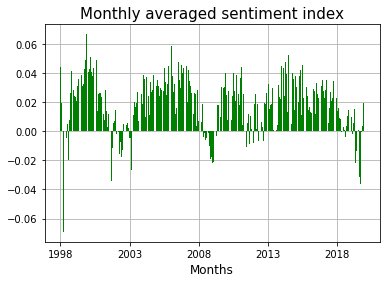

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nrows = mean_senti.shape[0]

styr=1998
edyr=2019

nyrs = edyr-styr+1
nm = nyrs*12

print('\n\tnrows = ',nrows)
print('\n\tnyrs = ',nyrs)
print('\n\tnm = ',nm)

fig, ax = plt.subplots(1,1)
ax.bar(np.arange(nrows),mean_senti['senti'],color='g')
plt.grid(True) #; ax.zorder(0)
ax.set_axisbelow(True)
plt.xticks(np.arange(0,nm,12*5),np.arange(styr,edyr,5))
plt.title('Monthly averaged sentiment index',fontsize=15)
plt.xlabel('Months',fontsize=12)
#plt.savefig('figs/monthly_sentiment.png', bbox_inches = 'tight')

plt.show()

## Read in S&P 500 and calcuate monthly average of closing price

In [10]:
sp500 = pd.read_csv('data/sp500_1998-2020.csv')

print('\n\tsp500 = ',sp500.shape,'\n')

#Drop the year 2020 since we do not have data for the whole year.
sp500 = sp500[~sp500['Date'].str.contains('2020')]
print('\n\tsp500 = ',sp500.shape,'\n')

print(sp500.head(5))


	sp500 =  (5716, 7) 


	sp500 =  (5535, 7) 

         Date        Open        High         Low       Close   Adj Close  \
0  1998-01-02  970.429993  975.039978  965.729980  975.039978  975.039978   
1  1998-01-05  975.039978  982.630005  969.000000  977.070007  977.070007   
2  1998-01-06  977.070007  977.070007  962.679993  966.580017  966.580017   
3  1998-01-07  966.580017  966.580017  952.669983  964.000000  964.000000   
4  1998-01-08  964.000000  964.000000  955.039978  956.049988  956.049988   

      Volume  
0  366730000  
1  628070000  
2  618360000  
3  667390000  
4  652140000  


In [12]:
sp500.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5530,2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
5531,2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000
5532,2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000
5533,2019-12-30,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3013290000
5534,2019-12-31,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2893810000


In [13]:
#Extract yearmonth from the Date and put it in another column
sp500['yearmonth'] = sp500['Date'].apply(lambda x : x[0:7])

sp500.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,yearmonth
0,1998-01-02,970.429993,975.039978,965.729980,975.039978,975.039978,366730000,1998-01
1,1998-01-05,975.039978,982.630005,969.000000,977.070007,977.070007,628070000,1998-01
2,1998-01-06,977.070007,977.070007,962.679993,966.580017,966.580017,618360000,1998-01
3,1998-01-07,966.580017,966.580017,952.669983,964.000000,964.000000,667390000,1998-01
4,1998-01-08,964.000000,964.000000,955.039978,956.049988,956.049988,652140000,1998-01


In [15]:
#Calculate the monthly mean of S&P closing price
mmean_sp500 = sp500.groupby('yearmonth')['Close'].mean().to_frame()

print('\t',mmean_sp500.shape)
print('\t',mean_senti.shape)
nmonths = mmean_sp500.shape[0]
print('\n\tnmonths = ',nmonths)

	 (264, 1)
	 (264, 2)

	nmonths =  264


In [16]:
mmean_sp500.head(5)

,Close
yearmonth,
1998-01,963.359003
1998-02,1023.742114
1998-03,1076.827731
1998-04,1112.196196
1998-05,1108.416998


In [17]:
mmean_sp500.reset_index(level=0,inplace=True)

mmean_sp500.head(5)

,yearmonth,Close
0,1998-01,963.359003
1,1998-02,1023.742114
2,1998-03,1076.827731
3,1998-04,1112.196196
4,1998-05,1108.416998



styr, edyr =  1998 2019


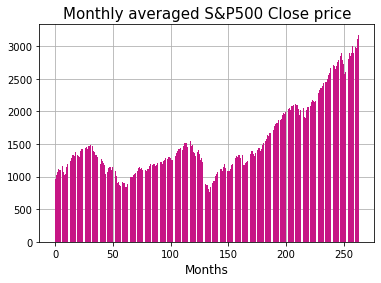

In [18]:
print('\nstyr, edyr = ',styr,edyr)

fig,ax = plt.subplots(1,1)
ax.bar(np.arange(nmonths),mmean_sp500['Close'],color='mediumvioletred')
plt.grid(True) #; ax.zorder(0)
ax.set_axisbelow(True)
plt.title('Monthly averaged S&P500 Close price',fontsize=15)
plt.xlabel('Months',fontsize=12)
#plt.savefig('figs/annual_average_sp500.png', bbox_inches = 'tight')

plt.show()

## Calculate consecutive differences in monthly closing price to quantify monthly movements
The first entry is for January 1998 which is not defined.

The second entry is quantifies the price movement (price(Feb_1998 - Jan_1998)).

In [19]:
dfmove = pd.DataFrame(mmean_sp500['Close'].diff())

dfmove.rename(columns={"Close":"move"},inplace=True)

print('\n',dfmove.shape)

#The first entry is Nan since difference is not defined. It is not dropped from the dataframe since
#the index 0 is never used in subsequent calculations. Also when the dataframe is printed out it reminds us
#that the movement for Januart 1998 is not defined.
#dfmove.dropna(inplace=True)
dfmove.head()


 (264, 1)


,move
0,NaN
1,60.383111
2,53.085617
3,35.368465
4,-3.779198


In [20]:
#Put the movement and the year and close price in the same dataframe
dfmove = pd.concat([mmean_sp500, dfmove],axis=1)

print('\n',dfmove.shape)

dfmove.head()


 (264, 3)


,yearmonth,Close,move
0,1998-01,963.359003,NaN
1,1998-02,1023.742114,60.383111
2,1998-03,1076.827731,53.085617
3,1998-04,1112.196196,35.368465
4,1998-05,1108.416998,-3.779198


In [104]:
mean_senti.head(5)

,yearmonth,senti
0,1998/01,0.044000
1,1998/02,0.019300
2,1998/03,0.000000
3,1998/04,-0.069167
4,1998/05,0.005317


## Combine two dataframes so that all the data required is in dfall

In [21]:
dfall = pd.concat([mean_senti, dfmove[['move','Close']]],axis=1)

print('\nshape = ',dfall.shape)

dfall.head()


shape =  (264, 4)


,yearmonth,senti,move,Close
0,1998/01,0.044000,NaN,963.359003
1,1998/02,0.019300,60.383111,1023.742114
2,1998/03,0.000000,53.085617,1076.827731
3,1998/04,-0.069167,35.368465,1112.196196
4,1998/05,0.005317,-3.779198,1108.416998


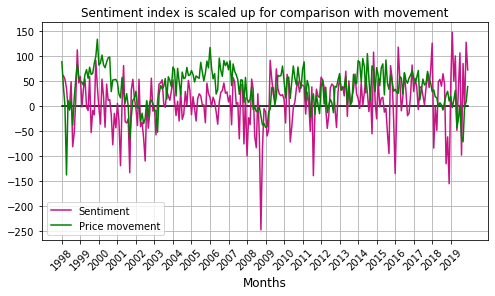

In [22]:
hd=[]

plt.figure(figsize=(8,4))
plt.plot(np.arange(nm),np.full(nm,0),'k-')
h1,=plt.plot(np.arange(nm),dfall['move'],color='mediumvioletred'); hd.append(h1)
h1,=plt.plot(np.arange(nm),dfall['senti']*2e3,color='green'); hd.append(h1)
plt.legend(hd,['Sentiment','Price movement'])
plt.grid(True) #; ax.zorder(0)
#plt.set_axisbelow(True)
plt.xticks(np.arange(0,nm,12),np.arange(styr,edyr+1,1),rotation=45)
plt.title('Sentiment index is scaled up for comparison with movement',fontsize=12)
plt.xlabel('Months',fontsize=12)
#plt.savefig('figs/monthly_overlap.png', bbox_inches = 'tight')


plt.show()

In [128]:
dfall.tail(8)

,yearmonth,senti,move,Close
256,2019/05,-0.022110,-49.094069,2854.705910
257,2019/06,-0.013279,35.460069,2890.165979
258,2019/07,0.000670,105.947657,2996.113636
259,2019/08,-0.031352,-98.663186,2897.450451
260,2019/09,-0.036023,84.705555,2982.156006
261,2019/10,-0.000589,-4.480808,2977.675198
262,2019/11,0.003903,127.229295,3104.904492
263,2019/12,0.019267,71.845020,3176.749512


## Predict the movement for next month
The first prediction is for 1998/03 and the last prediction is for 12/2019.

Sentiment model   : The prediction for any month is based on the sentiment index in the preceding month.

Persistence model : The prediction for any month is based on the movement in the preceding month.

true_move is the actual movement used for verification of the predictions. 

In [23]:
from collections import Counter

#print('\nfirst month = ',dfall.loc[0,'yearmonth'])
#print('last  month =',dfall.loc[nmons-1,'yearmonth'])

true_move  = ['UP' if x>=0  else 'DW' for x in dfall.loc[2:nm-1,'move']] #index 2 points to March 1998
pred_senti = ['UP' if x>=0  else 'DW' for x in dfall.loc[1:nm-2,'senti']] #index 1 points to Feb 1998
pred_persi = ['UP' if x>=0  else 'DW' for x in dfall.loc[1:nm-2,'move']]

npreds = len(true_move)

print('len(pred_senti) = ',len(pred_senti))
print('len(pred_persi) = ',len(pred_persi))
print('len(true_move)  = ',len(true_move))

print('')

count_move = Counter(true_move)

for key,value in count_move.items():
 print('# of {0:3s} movements are {1:5d}'.format(key,value))


len(pred_senti) =  262
len(pred_persi) =  262
len(true_move)  =  262

# of UP  movements are   162
# of DW  movements are   100


In [25]:
#Print out the predictions of the two models, their verifications and true movements for a few months.

print(len(hitmiss_senti),len(move_magn))

dfverif = dfall.copy()

dfverif.loc[2:npreds+1,'sentipred'] = pred_senti[:]
dfverif.loc[2:npreds+1,'sentiver']  = hitmiss_senti[:]

dfverif.loc[2:npreds+1,'persipred'] = pred_persi[:]
dfverif.loc[2:npreds+1,'persiver']  = hitmiss_persi[:]

dfverif.head(10)

262 262


,yearmonth,senti,move,Close,sentipred,sentiver,persipred,persiver
0,1998/01,0.044000,NaN,963.359003,NaN,NaN,NaN,NaN
1,1998/02,0.019300,60.383111,1023.742114,NaN,NaN,NaN,NaN
2,1998/03,0.000000,53.085617,1076.827731,UP,CORRECT,UP,CORRECT
3,1998/04,-0.069167,35.368465,1112.196196,UP,CORRECT,UP,CORRECT
4,1998/05,0.005317,-3.779198,1108.416998,DW,CORRECT,UP,WRONG
5,1998/06,-0.004322,-0.027467,1108.389532,UP,WRONG,DW,CORRECT
6,1998/07,0.005036,48.187739,1156.577271,DW,WRONG,DW,WRONG
7,1998/08,-0.019504,-81.956799,1074.620472,UP,WRONG,UP,WRONG
8,1998/09,0.007407,-53.980472,1020.640000,DW,CORRECT,DW,CORRECT
9,1998/10,0.026629,11.830009,1032.470010,UP,CORRECT,DW,WRONG


In [26]:
dfverif.tail(10)

,yearmonth,senti,move,Close,sentipred,sentiver,persipred,persiver
254,2019/03,0.005633,49.119587,2803.983794,DW,WRONG,UP,CORRECT
255,2019/04,0.015452,99.816185,2903.799979,UP,CORRECT,UP,CORRECT
256,2019/05,-0.022110,-49.094069,2854.705910,UP,WRONG,UP,WRONG
257,2019/06,-0.013279,35.460069,2890.165979,DW,WRONG,DW,WRONG
258,2019/07,0.000670,105.947657,2996.113636,DW,WRONG,UP,CORRECT
259,2019/08,-0.031352,-98.663186,2897.450451,UP,WRONG,UP,WRONG
260,2019/09,-0.036023,84.705555,2982.156006,DW,WRONG,DW,WRONG
261,2019/10,-0.000589,-4.480808,2977.675198,DW,CORRECT,UP,WRONG
262,2019/11,0.003903,127.229295,3104.904492,DW,WRONG,DW,WRONG
263,2019/12,0.019267,71.845020,3176.749512,UP,CORRECT,UP,CORRECT


In [27]:
#Filter out all the wrong predictions for the sentiment model.

print('\ndfverif1.shape = ',dfverif.shape)

dfwrong1 = dfverif.loc[dfverif['sentiver']=='WRONG']

print('\ndfwrong1.shape = ',dfwrong1.shape)

dfwrong1.head()



dfverif1.shape =  (264, 8)

dfwrong1.shape =  (99, 8)


,yearmonth,senti,move,Close,sentipred,sentiver,persipred,persiver
5,1998/06,-0.004322,-0.027467,1108.389532,UP,WRONG,DW,CORRECT
6,1998/07,0.005036,48.187739,1156.577271,DW,WRONG,DW,WRONG
7,1998/08,-0.019504,-81.956799,1074.620472,UP,WRONG,UP,WRONG
13,1999/02,0.023570,-2.192620,1246.582115,UP,WRONG,UP,WRONG
16,1999/05,0.036214,-2.682650,1332.074011,UP,WRONG,UP,WRONG


In [28]:
#Filter out all the wrong predictions for the persistence model.
print('\n',dfverif.shape)

dfwrong2 = dfverif.loc[dfverif['persiver']=='WRONG']

print('\n',dfwrong2.shape)

dfwrong2.head()


 (264, 8)

 (104, 8)


,yearmonth,senti,move,Close,sentipred,sentiver,persipred,persiver
4,1998/05,0.005317,-3.779198,1108.416998,DW,CORRECT,UP,WRONG
6,1998/07,0.005036,48.187739,1156.577271,DW,WRONG,DW,WRONG
7,1998/08,-0.019504,-81.956799,1074.620472,UP,WRONG,UP,WRONG
9,1998/10,0.026629,11.830009,1032.470010,UP,CORRECT,DW,WRONG
13,1999/02,0.023570,-2.192620,1246.582115,UP,WRONG,UP,WRONG


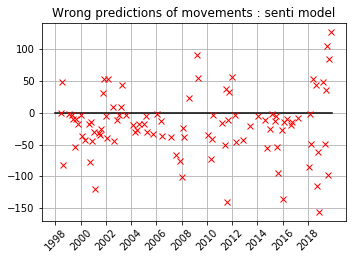

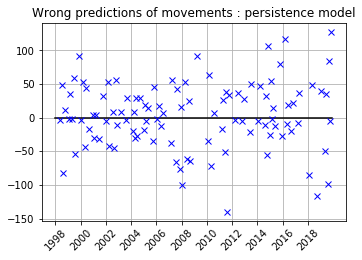

In [29]:
#Scatter plot of True movements when the model prediction is wrong.

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(np.arange(0,nm),np.full(nm,0),'k-')
plt.plot(dfwrong1['move'],'x',color='r')
plt.grid(True)
plt.xticks(np.arange(0,nm,12*2),np.arange(styr,edyr+1,2),rotation=45)
plt.title('Wrong predictions of movements : senti model')
#plt.savefig('figs/monthly_wrong_senti.png', bbox_inches = 'tight')

plt.figure(figsize=(12,8))
plt.subplot(2,2,3)
plt.plot(np.arange(0,nm),np.full(nm,0),'k-')
h1,=plt.plot(dfwrong2['move'],'x',color='b'); hd.append(h1)
plt.grid(True)
plt.xticks(np.arange(0,nm,12*2),np.arange(styr,edyr+1,2),rotation=45)
plt.title('Wrong predictions of movements : persistence model')
#plt.savefig('figs/monthly_wrong_persi.png', bbox_inches = 'tight')

plt.show()

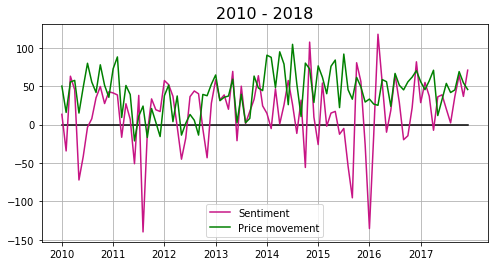

In [95]:
import calendar

sy=2010
ey=2018

sidx = (sy-1998)*12
eidx = (ey-1998)*12

#print('\n\tsidx, eidx = ',sidx,eidx)

#print('\n',list(calendar.month_abbr)[1:])

indx = list(dfall.index[sidx:eidx])
ll = len(indx)

#print('\n',indx,ll)
#print('\n',indx[0:ll+1:12])

hd=[]
plt.figure(figsize=(8,4))
plt.plot(indx,np.full(len(indx),0),'k-')
h1,=plt.plot(indx,dfall.loc[indx,'move'],color='mediumvioletred'); hd.append(h1)
h1,=plt.plot(indx,dfall.loc[indx,'senti']*2e3,color='green'); hd.append(h1)
plt.legend(hd,['Sentiment','Price movement'])
plt.grid(True)
plt.title(np.str(sy)+' - '+np.str(ey),fontsize=16)
#plt.xticks(indx,list(calendar.month_abbr)[1:])
plt.xticks(indx[0:ll+1:12],list(range(sy,ey+1)))
plt.savefig('figs/2010-2018.png', bbox_inches = 'tight')

plt.show()

In [48]:
dfall.head(5)

,yearmonth,senti,move,Close
0,1998/01,0.044000,NaN,963.359003
1,1998/02,0.019300,60.383111,1023.742114
2,1998/03,0.000000,53.085617,1076.827731
3,1998/04,-0.069167,35.368465,1112.196196
4,1998/05,0.005317,-3.779198,1108.416998


In [32]:
#Largest errors made by the sentiment modoel

dfsort = dfwrong1.sort_values(by='move',axis='index',ascending=False,inplace=False)
dfsort[['yearmonth','senti','move','Close','sentipred','sentiver']].head(10)

,yearmonth,senti,move,Close,sentipred,sentiver
262,2019/11,0.003903,127.229295,3104.904492,DW,WRONG
258,2019/07,0.000670,105.947657,2996.113636,DW,WRONG
135,2009/04,-0.003193,91.025085,848.151899,DW,WRONG
260,2019/09,-0.036023,84.705555,2982.156006,DW,WRONG
168,2012/01,0.018758,57.255168,1300.578015,DW,WRONG
136,2009/05,0.018157,54.256603,902.408502,DW,WRONG
50,2002/03,-0.000323,53.122065,1153.791003,DW,WRONG
46,2001/11,0.005613,53.092894,1129.683332,DW,WRONG
245,2018/06,0.003034,52.859269,2754.352888,DW,WRONG
254,2019/03,0.005633,49.119587,2803.983794,DW,WRONG


In [34]:
#Largest errors made by the prediction model

dfsort = dfwrong2.sort_values(by='move',axis='index',ascending=False,inplace=False)
dfsort[['yearmonth','senti','move','Close','persipred','persiver']].head(10)

,yearmonth,senti,move,Close,persipred,persiver
262,2019/11,0.003903,127.229295,3104.904492,DW,WRONG
218,2016/03,0.012504,117.535597,2021.954090,DW,WRONG
202,2014/11,0.036184,107.297755,2044.572105,DW,WRONG
135,2009/04,-0.003193,91.025085,848.151899,DW,WRONG
22,1999/11,0.049290,90.992838,1391.002848,DW,WRONG
260,2019/09,-0.036023,84.705555,2982.156006,DW,WRONG
213,2015/10,0.030704,80.410332,2024.812716,DW,WRONG
146,2010/03,0.027713,62.888701,1152.048690,DW,WRONG
18,1999/07,0.038632,58.437267,1380.990002,DW,WRONG
111,2007/04,0.041905,56.688682,1463.640503,DW,WRONG


In [35]:
from collections import Counter

print(Counter(true_move).keys())
print(Counter(true_move).values())

dict_keys(['UP', 'DW'])
dict_values([162, 100])


In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print('\naccuracy = {0:6.2f}'.format(accuracy_score(true_move, pred_senti)))
print('\naccuracy = {0:6.2f}'.format(accuracy_score(true_move, pred_persi)))


accuracy =   0.62

accuracy =   0.60


In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

confusion_matrix(true_move, pred_senti,labels=['UP','DW'])

array([[142,  20],
       [ 79,  21]], dtype=int64)

In [38]:
confusion_matrix(true_move, pred_persi,labels=['UP','DW'])

array([[110,  52],
       [ 52,  48]], dtype=int64)

In [39]:
dfall.head(10)

,yearmonth,senti,move,Close
0,1998/01,0.044000,NaN,963.359003
1,1998/02,0.019300,60.383111,1023.742114
2,1998/03,0.000000,53.085617,1076.827731
3,1998/04,-0.069167,35.368465,1112.196196
4,1998/05,0.005317,-3.779198,1108.416998
5,1998/06,-0.004322,-0.027467,1108.389532
6,1998/07,0.005036,48.187739,1156.577271
7,1998/08,-0.019504,-81.956799,1074.620472
8,1998/09,0.007407,-53.980472,1020.640000
9,1998/10,0.026629,11.830009,1032.470010


In [40]:
dfall.tail(10)

,yearmonth,senti,move,Close
254,2019/03,0.005633,49.119587,2803.983794
255,2019/04,0.015452,99.816185,2903.799979
256,2019/05,-0.022110,-49.094069,2854.705910
257,2019/06,-0.013279,35.460069,2890.165979
258,2019/07,0.000670,105.947657,2996.113636
259,2019/08,-0.031352,-98.663186,2897.450451
260,2019/09,-0.036023,84.705555,2982.156006
261,2019/10,-0.000589,-4.480808,2977.675198
262,2019/11,0.003903,127.229295,3104.904492
263,2019/12,0.019267,71.845020,3176.749512


## Set up four more models : Perfect model, Bad model, always UP model and always DOWN prediction model.

In [42]:
perfect_move = true_move.copy()   # all predictions correct.

bad_move= ['UP' if x=='DW' else 'DW' for x in true_move]  # all predictions wrong.

pred_UP = ['UP' for i in range(npreds)]  # all predictions upwards

pred_DW = ['DW' for i in range(npreds)]  #all predictions downwards

In [43]:
#Calculate gradient metric for each of these models
import backtrade
import importlib
from numpy import ma
importlib.reload(backtrade)

move_magn = np.asarray(dfall.loc[2:npreds+1,'move'])

print('\nlen(move_magn) = ',len(move_magn))
print('move_magn[0] = ',move_magn[0])
print('move_magn[npreds-1] = ',move_magn[npreds-1])

hitmiss_senti,sum_magn = backtrade.magnitude_move(pred_senti,true_move,move_magn)
print('\ngradient metric : senti = {0:8.2f}'.format(sum_magn))    
hitmiss_persi,sum_magn = backtrade.magnitude_move(pred_persi,true_move,move_magn)
print('gradient metric : persi = {0:8.2f}'.format(sum_magn))
hitmiss,sum_magn = backtrade.magnitude_move(perfect_move,true_move,move_magn)
print('gradient metric : perfect = {0:8.2f}'.format(sum_magn))    
hitmiss,sum_magn = backtrade.magnitude_move(bad_move,true_move,move_magn)
print('gradient metric : imperfect = {0:8.2f}'.format(sum_magn))    
hitmiss, sum_magn = backtrade.magnitude_move(pred_UP,true_move,move_magn)
print('gradient metric : UP = {0:8.2f}'.format(sum_magn))    
hitmiss, sum_magn = backtrade.magnitude_move(pred_DW,true_move,move_magn)
print('gradient metric : DOWN = {0:8.2f}'.format(sum_magn))   

print('')


len(move_magn) =  262
move_magn[0] =  53.08561740669904
move_magn[npreds-1] =  71.84501955952283

gradient metric : senti =  2486.39
gradient metric : persi =  2563.44
gradient metric : perfect = 10444.74
gradient metric : imperfect = -10444.74
gradient metric : UP =  2153.01
gradient metric : DOWN = -2153.01



## Backtrading

In [44]:
closeprice = np.asarray(dfall.loc[1:npreds+1,'Close'])

print('\n\tcloseprice[0]      = ',closeprice[0])
print('\n\tcloseprice[npreds] = ',closeprice[npreds])
print('\n\tlen(closeprice) = ',len(closeprice))


	closeprice[0]      =  1023.7421136842103

	closeprice[npreds] =  3176.7495118095235

	len(closeprice) =  263


In [45]:
import backtrade
import importlib
importlib.reload(backtrade)

print('\ninvest = ',closeprice[0])

print('\npersistence model')
invest,stock,cash = backtrade.trade(pred_persi,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\t\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\t\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nsentiment model')
invest,stock,cash = backtrade.trade(pred_senti,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\t\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\t\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nperfect model')
invest,stock,cash = backtrade.trade(true_move,closeprice) #Hypothetical model
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\t\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\t\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

bad_move= ['UP' if x=='DW' else 'DW' for x in true_move]  #Hypothetical model
print('\nimperfect model')
invest,stock,cash = backtrade.trade(bad_move,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\t\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\t\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

pred_UP = ['UP' for i in np.arange(npreds)]
print('\nAlways UP model')
invest,stock,cash = backtrade.trade(pred_UP,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\t\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\t\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

pred_DW = ['DW' for i in np.arange(npreds)]
print('\nAlways DW model')
invest,stock,cash = backtrade.trade(pred_DW,closeprice)
cash_end = cash[npreds-1]+stock[npreds-1]*closeprice[npreds]
print('\t\tCash at end of {0:2d} years = {1:6.1f} '.format(npreds+1,cash_end))
print('\t\tNet profit = {0:6.1f}'.format(cash_end - invest))
print('\t\t%profit = {0:6.1f}'.format(100.0*(cash_end - invest)/invest))

print('\nBUY and HOLD model')
cash_end_hold = closeprice[npreds]

print('\t\tCash at end of all years = {0:6.1f} '.format(cash_end_hold))
print('\t\tNet profit/loss = ',cash_end_hold - invest)
print('\t\t% profit/loss = ',100.0*(cash_end_hold - invest)/invest)


invest =  1023.7421136842103

persistence model
		Cash at end of 263 years = 4700.4 
		Net profit = 3676.6
		%profit =  359.1

sentiment model
		Cash at end of 263 years = 4986.5 
		Net profit = 3962.7
		%profit =  387.1

perfect model
		Cash at end of 263 years = 67873.2 
		Net profit = 66849.4
		%profit = 6529.9

imperfect model
		Cash at end of 263 years =   47.9 
		Net profit = -975.8
		%profit =  -95.3

Always UP model
		Cash at end of 263 years = 3176.7 
		Net profit = 2153.0
		%profit =  210.3

Always DW model
		Cash at end of 263 years = 1023.7 
		Net profit =    0.0
		%profit =    0.0

BUY and HOLD model
		Cash at end of all years = 3176.7 
		Net profit/loss =  2153.007398125313
		% profit/loss =  210.3075930301567


In [132]:
from functools import reduce

#Annualized returns
#rets = [.03,.07,.05,.12,.01]
#nyrs = len(rets)
nyrs = 20

#multrets = reduce(lambda x,y : x*y,   [(1. + x) for x in rets])

totperc = 100*4986/invest

print('\nReturn over 20 years : totperc = ',totperc)

multrets = totperc/100.0

temp = multrets**(1.0/nyrs)

#print('\n',multrets,temp)

print('\nAnnualized return for sentiment model = ',100*(temp-1))



Return over 20 years : totperc =  487.03671885261645

Annualized return for sentiment model =  8.237582891503848
